PRAFULLA RAVA

##Predict the percentage of an student based on the no. of study hours.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('http://bit.ly/w-data')

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
df.shape

(25, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

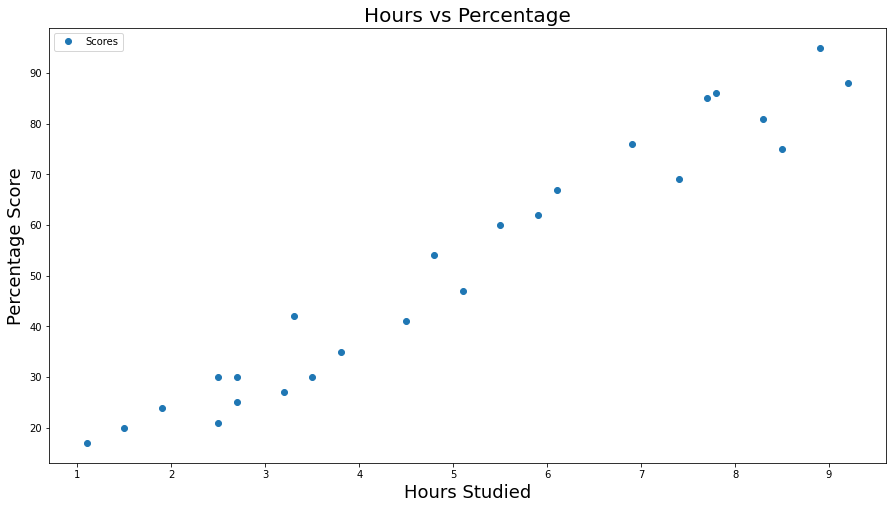

In [ ]:
df.plot(x='Hours', y='Scores', style='o', figsize=(15,8))
plt.title('Hours vs Percentage',fontsize=20)
plt.xlabel('Hours Studied',fontsize=18)
plt.ylabel('Percentage Score',fontsize=18)
plt.show()

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [ ]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0) 

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print('Training complete')

Training complete


In [ ]:
print('Coefficient is:',regressor.coef_)
print('Intercept is:',regressor.intercept_)

Coefficient is: [9.78856669]
Intercept is: 2.3708153823418883


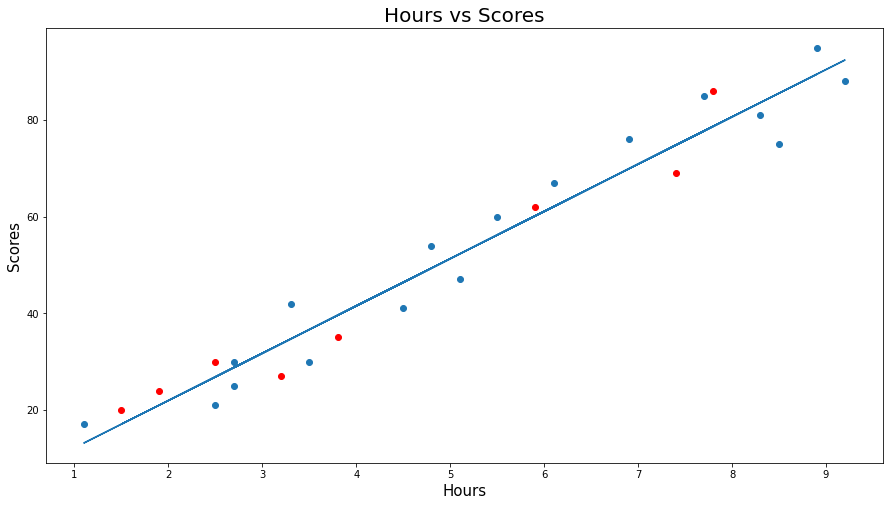

In [ ]:
line = regressor.coef_*x + regressor.intercept_
fig = plt.figure(figsize=(15,8))
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color='red')
plt.plot(x, line)
plt.title('Hours vs Scores',fontsize=20)
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.show()

In [ ]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9],
       [7.8]])

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
df1

,Actual,Predict
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


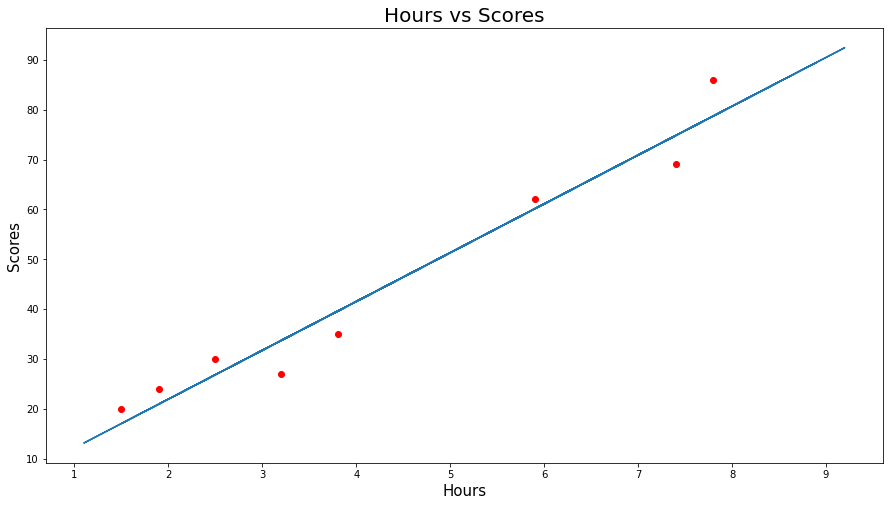

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.scatter(x_test, y_test, color='red')
plt.plot(x, line)
plt.title('Hours vs Scores',fontsize=20)
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.show()

In [ ]:
hour = 9.25
pred = regressor.predict([[hour]])
print('No of hour = {}'.format(hour))
print('Predicted score = {}'.format(pred[0]))

No of hour = 9.25
Predicted score = 92.91505723477056


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared Error', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.419727808027651
Mean squared Error 22.965097212700428
Root Mean squared Error 4.7921912746363144


In [ ]:
from sklearn.metrics import r2_score
print('R2_Score :', r2_score(y_test, y_pred))

R2_Score : 0.9568211104435257
